In [2]:
# List of referense: w3schools, chatGPT
import numpy as np

def clean_data(text_path, label):
    cleaned_data = []
    with open(text_path, "r") as file:
        next(file)
        for line in file:
            # split the row by the comma to separate the decimal number
            numbers = line.strip().strip('()').split(',')
            # convert from string to float and create a numpy-array
            clean_numbers = np.array([float(number) for number in numbers])
            cleaned_data.append([clean_numbers, label])
    return cleaned_data

In [3]:
pichu_data = clean_data("pichu.txt", 0)[1:]
pikachu_data = clean_data("pikachu.txt", 1)[1:]

pichu_numbers = np.array([data[0] for data in pichu_data])
pichu_labels = np.array([data[1] for data in pichu_data])

pikachu_numbers = np.array([data[0] for data in pikachu_data])
pikachu_labels = np.array([data[1] for data in pikachu_data])

pichu_data = np.column_stack((pichu_numbers, pichu_labels))
pikachu_data = np.column_stack((pikachu_numbers, pikachu_labels))

combined_data = np.concatenate((pichu_data, pikachu_data), axis=0)

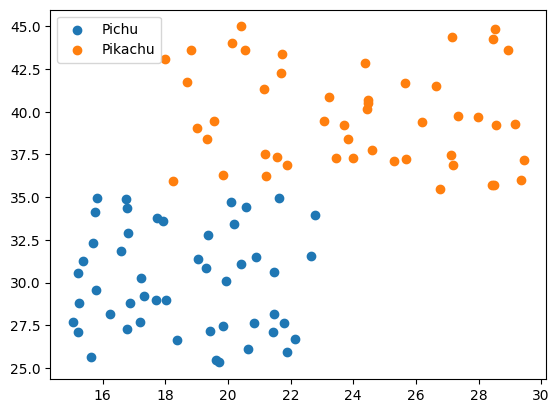

In [5]:
import matplotlib.pyplot as plt

def plot_data(data, label):
    # Extrahera x- och y-kordinaterna från datan
    x = [float(row[0]) for row in data]
    y = [float(row[1]) for row in data]

    plt.scatter(x, y, label=label)

plot_data(pichu_data, label="Pichu")
plot_data(pikachu_data, label="Pikachu")

plt.legend()
plt.show()

In [78]:
with open("test_points.txt", "r") as file:
    test_data = file.read()
test_data = eval(f"[{test_data}]")

30

In [77]:
for i, test_point in enumerate(test_data):
    distances = np.sqrt((combined_data[:,0] - test_point[0])**2 + (combined_data[:,1] - test_point[1])**2)
    index = np.argmin(distances)
    print(f"Testpoint {i+1}: Closest point is index {index} with distance {distances[index]}")
    correct_pokemon = combined_data[index][2]
    if correct_pokemon == 0:
        print(f"- It's a Pichu!\n")
    else:
        print(f"- It's a Pikachu!\n")

Testpoint 1: Closest point is index 95 with distance 1.8304663206363925
- It's a Pikachu!

Testpoint 2: Closest point is index 43 with distance 11.652774129430805
- It's a Pichu!

Testpoint 3: Closest point is index 23 with distance 3.686062473303827
- It's a Pichu!

Testpoint 4: Closest point is index 96 with distance 1.586203468458903
- It's a Pikachu!

